Hometask #2 (SVM)

student:Yermukhamet Medetov

id: 201516001



In [ ]:
# dataset  отсюда https://www.kaggle.com/c/ieee-fraud-detection 

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score,fbeta_score

from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
from sklearn.model_selection import learning_curve


from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/drive/My Drive/541_ML_hometask/creditcard.csv') #My dataset is about predicting credit card Fraud

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

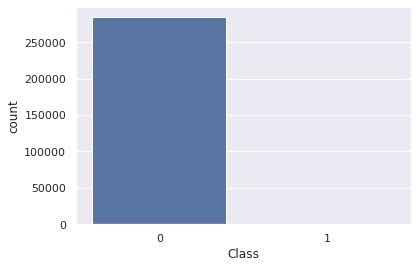

In [ ]:
sns.set(style= "darkgrid" )
ax = sns.countplot(x="Class", data=df)

In [ ]:
X=df.iloc[:,0:30]

In [ ]:
y=df.iloc[:,30:]

Splitting data into Train, Test, Validation:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2) # 60% is training
                                                                                   # 20% is validaton
                                                                                   # 20% is test

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(182276, 30)
(56962, 30)
(45569, 30)


In [ ]:
X_train = StandardScaler().fit_transform(X_train) #Standartizing our features
X_test = StandardScaler().fit_transform(X_test) #Standartizing our features
X_val=StandardScaler().fit_transform(X_val)


**Question 3,4,5,6**  
All modifications of SVM with Common C (in our Case we chose C by default 1)

In [ ]:
models=['linear','poly','rbf','sigmoid']
model_scores=[]
for kernel in models:
  model=SVC(kernel=kernel)
  model.fit(X_train,y_train)
  model_all=model.score(X_val,y_val)
  model_scores.append(model_all)
print(dict(zip(models,model_scores)))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'linear': 0.9993197129627598, 'poly': 0.9996269393666747, 'rbf': 0.999297768219623, 'sigmoid': 0.9984858127235621}


In [ ]:
#C_values=[1/182276,2/182276,1/(2*182276), 4/182276,1/(4*182276)] # HERE I use formula for choosing value of C from Lecture 6 slide 8
C_values=[0.25,0.5,1,2,4]

**At next steps I will do : **


Train Model on Training set with given kernel **->** Then I will Train Model On Validation set and Choose Best C  **->**  Then With right C I will train Testing Set

In [ ]:
#Model # 1

scores_linear=[]
for C in C_values:
  kernel_linear = SVC(C=C,kernel='linear')
  kernel_linear.fit(X_train,y_train)
  score_linear=kernel_linear.score(X_train,y_train)
  scores_linear.append(score_linear)
print('Values of C',C_values)
print('Score',scores_linear)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Values of C [0.25, 0.5, 1, 2, 4]
Score [0.9994294366784436, 0.9994294366784436, 0.9994294366784436, 0.9994294366784436, 0.9994294366784436]


In [ ]:
scores=[]
for C in C_values:
  best_linear=SVC(C=C, kernel='linear').fit(X_val,y_val)
  scores.append(best_linear.score(X_val,y_val))

print('C_values:',C_values)
print('Scores on Validation set: ',scores)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C_values: [0.25, 0.5, 1, 2, 4]
Scores on Validation set:  [0.9994952709078541, 0.9994952709078541, 0.9994952709078541, 0.9994952709078541, 0.9994952709078541]


In [ ]:
# we can take any C and Check in testing data because Score are equal 

In [ ]:
best_linear_test=SVC(C=4,kernel='linear').fit(X_test,y_test)
best_linear_test.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9992451107756047

The following steps will be done similiarly as previous for other 3 kernels:

 **-Poly(2)**

 **-RBF(3)**

 **-Sigmoid(tanh) (4)**

In [ ]:
#Model # 2

best_value_poly=[]
for C in C_values:
  kernel_poly = SVC(C=C,kernel='poly').fit(X_train, y_train)
  score_poly=kernel_poly.score(X_train,y_train)
  best_value_poly.append(score_poly)
print('Values of C',C_values)
print('Scores',best_value_poly)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Values of C [0.25, 0.5, 1, 2, 4]
Scores [0.9997311768965744, 0.9997695801970637, 0.9997915249402006, 0.9998079834975532, 0.9998189558691215]


In [ ]:
score_poly_val=[]
for C in C_values:
  best_poly=SVC(C=C,kernel='poly').fit(X_val,y_val)
  score_poly_val.append(best_poly.score(X_val,y_val))
print(score_poly_val)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.9998244420549057, 0.9998463867980425, 0.9998683315411793, 0.9999122210274529, 0.9999122210274529]


In [ ]:
best_poly_test=SVC(C=4).fit(X_test,y_test)
best_poly_test.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9997366665496296

In [ ]:
#Model # 3

best_value_rbf=[]
for C in C_values:
  kernel_rbf = SVC(C=C,kernel='rbf')
  kernel_rbf.fit(X_train, y_train)
  score_rbf= kernel_rbf.score(X_train,y_train)
  best_value_rbf.append(score_rbf)
print('C values ', C_values)
print('Score',best_value_rbf)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C values  [0.25, 0.5, 1, 2, 4]
Score [0.9991606135750181, 0.9994623537931488, 0.9996653426671641, 0.9997366630823586, 0.9997970111259847]


In [ ]:
score_rbf_val=[]
for C in C_values:
  best_rbf=SVC(C=C,kernel='rbf').fit(X_val,y_val)
  score_rbf_val.append(best_rbf.score(X_val,y_val))
print(C_values)
print(score_rbf_val)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.25, 0.5, 1, 2, 4]
[0.9984419232372885, 0.9989685970725712, 0.9997805525686322, 0.9998463867980425, 0.9999122210274529]


At C=4 we have score 0.9999122210274529 which is more than others

In [ ]:
best_rbf_test=SVC(C=4,kernel='rbf').fit(X_test,y_test)
print(best_rbf.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9989817773252344


In [ ]:
#Model # 4
best_value_sigmoid=[]
for C in C_values:
  kernel_sigmoid = SVC(C=C,kernel='sigmoid')
  kernel_sigmoid.fit(X_train, y_train)
  score_sigmoid=kernel_sigmoid.score(X_train,y_train)
  best_value_sigmoid.append(score_sigmoid)
print('C values',C_values)
print('Scores',best_value_sigmoid)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

C values [0.25, 0.5, 1, 2, 4]
Scores [0.9985187298382673, 0.9985077574666988, 0.9985077574666988, 0.9983815751936623, 0.9984254646799359]


In [ ]:
score_sigmoid_val=[]
for C in C_values:
  best_sigmoid=SVC(C=C,kernel='rbf').fit(X_val,y_val)
  score_sigmoid_val.append(best_sigmoid.score(X_val,y_val))
print(C_values)
print(score_sigmoid_val)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.25, 0.5, 1, 2, 4]
[0.9984419232372885, 0.9989685970725712, 0.9997805525686322, 0.9998463867980425, 0.9999122210274529]


In [ ]:
best_sigmoid_test=SVC(C=4,kernel='sigmoid').fit(X_test,y_test)
print(best_sigmoid_test.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.998156665847407


**Question 7** Find weight vectors of 1st Model (on training set)


In [ ]:
weights=[]
for C in C_values:
  kernel_linear = SVC(C=C,kernel='linear')
  kernel_linear.fit(X_train,y_train)
  coefs=kernel_linear.coef_
  weights.append(coefs)
print('Values of C',C_values)


In [ ]:
for i in range(5):
    print('For each Value of C :',C_values[i], 'We have Weights:',weights[i])

For each Value of C : 0.25 We have Weights: [[-0.00487206  0.12793529 -0.0879466   0.01594251  0.0660712   0.0093594
   0.00321509 -0.04936028 -0.02204267 -0.1487356  -0.19866867 -0.00174664
   0.01204874 -0.05327829 -0.08602537  0.01518337 -0.03164855 -0.1074393
  -0.0473202   0.0403001  -0.06508202  0.03564804  0.02285259 -0.00267355
   0.00422794 -0.02008879 -0.00295201 -0.05641284 -0.01608951  0.01767778]]
For each Value of C : 0.5 We have Weights: [[-0.00494482  0.13692774 -0.09359356  0.01695229  0.07051001  0.01186378
   0.00319642 -0.04998997 -0.02316712 -0.16365192 -0.21135231 -0.00750541
   0.02855672 -0.06579718 -0.09760478  0.02014839 -0.02926161 -0.11690895
  -0.05372556  0.04507341 -0.06895684  0.03916315  0.02610753 -0.00308363
   0.00487638 -0.02091082 -0.00319134 -0.06064882 -0.01731832  0.01911923]]
For each Value of C : 1 We have Weights: [[-0.00499177  0.13651152 -0.09084096  0.01652443  0.07413661  0.01428632
   0.00270545 -0.04823291 -0.02287005 -0.16172481 -0.214

Above **I have found Weights** for Our Svm model when our **Kernel is Linear**.

I have Considered for **each Case of C**.

**Question 8**  FOR Model $\alpha$=1 (Linear) Do following:

-Finding Error rate (On training Set)

-Precision and Recall (On training set)

-The number of support vectors (On Training set)

In [ ]:
# Model # 1

error_rate=[]
recall_linear=[]
precision_linear=[]
support_vectors=[]
for C in C_values:
  kernel_linear = SVC(C=C,kernel='linear')
  kernel_linear.fit(X_train,y_train)
  y_pred_linear=kernel_linear.predict(X_train)
  supp_vec=kernel_linear.support_vectors_
  error_rate.append(1-accuracy_score(y_train,y_pred_linear))
  recall_linear.append(recall_score(y_train,y_pred_linear))
  precision_linear.append(precision_score(y_train,y_pred_linear))
  support_vectors.append(supp_vec)
print('Values of C:' , C_values)
print('Error rate on training set :',error_rate)
print('Recall score on training set: ',recall_linear)
print('Precision score on training set: ', precision_linear)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Values of C: [0.25, 0.5, 1, 2, 4]
Error rate on training set : [0.000603480436261461, 0.000603480436261461, 0.000603480436261461, 0.000603480436261461, 0.000603480436261461]
Recall score on training set:  [0.8018867924528302, 0.8018867924528302, 0.8018867924528302, 0.8018867924528302, 0.8018867924528302]
Precision score on training set:  [0.8443708609271523, 0.8443708609271523, 0.8443708609271523, 0.8443708609271523, 0.8443708609271523]


In [ ]:
# exact number of support vectors for each C
print(len(support_vectors[0]))
print(len(support_vectors[1]))
print(len(support_vectors[2]))
print(len(support_vectors[3]))
print(len(support_vectors[4]))

308
305
306
303
309


**Question 9**   For Model $\alpha$=1 (Linear) Do the following on **VALIDATION SET**:

-Error rate

-Precision and Recall

-$F_{\beta}$ where $\beta$ = 0.5,1,2

In [ ]:
# Model # 1

error_rate_validation=[]
recall_linear_validation=[]
precision_linear_validation=[]
f_beta_score_0=[]

for C in C_values:
  kernel_linear_validation = SVC(C=C,kernel='linear')
  kernel_linear_validation.fit(X_val,y_val)
  y_pred_linear_validation=kernel_linear_validation.predict(X_val)
  
  error_rate_validation.append(1-accuracy_score(y_val,y_pred_linear_validation))
  recall_linear_validation.append(recall_score(y_val,y_pred_linear_validation))
  precision_linear_validation.append(precision_score(y_val,y_pred_linear_validation))
  
print('------------------------------------------------')

print('Values of C:' , C_values)
print('Error rate on training set :',error_rate_validation)
print('Recall score on training set: ',recall_linear_validation)
print('Precision score on training set: ', precision_linear_validation)
print('------------------------------------------------')
print(fbeta_score(y_val,y_pred_linear_validation,average='binary',beta=0.5))
print(fbeta_score(y_val,y_pred_linear_validation,average='micro',beta=0.5))
print(fbeta_score(y_val,y_pred_linear_validation,average='macro',beta=0.5))
print(fbeta_score(y_val,y_pred_linear_validation,average='weighted',beta=0.5))
print('------------------------------------------------')
print(fbeta_score(y_val,y_pred_linear_validation,average='binary',beta=1))
print(fbeta_score(y_val,y_pred_linear_validation,average='micro',beta=1))
print(fbeta_score(y_val,y_pred_linear_validation,average='macro',beta=1))
print(fbeta_score(y_val,y_pred_linear_validation,average='weighted',beta=1))
print('------------------------------------------------')
print(fbeta_score(y_val,y_pred_linear_validation,average='binary',beta=2))
print(fbeta_score(y_val,y_pred_linear_validation,average='micro',beta=2))
print(fbeta_score(y_val,y_pred_linear_validation,average='macro',beta=2))
print(fbeta_score(y_val,y_pred_linear_validation,average='weighted',beta=2))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

------------------------------------------------
Values of C: [0.25, 0.5, 1, 2, 4]
Error rate on training set : [0.00041695011959885786, 0.00041695011959885786, 0.00041695011959885786, 0.00043889486273562817, 0.00039500537646208755]
Recall score on training set:  [0.8591549295774648, 0.8591549295774648, 0.8591549295774648, 0.8591549295774648, 0.8591549295774648]
Precision score on training set:  [0.8714285714285714, 0.8714285714285714, 0.8714285714285714, 0.8591549295774648, 0.8840579710144928]
------------------------------------------------
0.8789625360230546
0.9996049946235379
0.9393757725786005
0.9996007522140714
------------------------------------------------
0.8714285714285713
0.9996049946235379
0.9356153824416863
0.9996021774973771
------------------------------------------------
0.8640226628895185
0.9996049946235379
0.9319190205063526
0.9996038026490356


Moreover above I have considered Different   **$\alpha$**    values with different average values.

At C=4 our model show less error rate, which says that it's score is better . We will use this C on testing data.

**Question 10 and 11**


- Finding **weight** vectors for models $\alpha$= 2,3,4 on Training set
(I am not sure is it correct, because We can find weights in the case of Linear Kernel)

- Do subproblems like in question 8-9 to models: 2,3,4 

In [ ]:
weights2=[]
for C in C_values:
  model2=SVC(C=C,kernel='poly').fit(X_train,y_train)
  weights2.append(model2.dual_coef_)


In [ ]:
# As each models vector  weiths are huge , I decided to print their length for each case of C
print(weights2[0].shape)
print(weights2[1].shape)
print(weights2[2].shape)
print(weights2[3].shape)
print(weights2[4].shape)

(1, 537)
(1, 581)
(1, 639)
(1, 681)
(1, 775)


In [ ]:
weights3=[]
for C in C_values:
  model3=SVC(C=C,kernel='rbf').fit(X_train,y_train)
  weights3.append(model3.dual_coef_)


In [ ]:
print(weights3[0].shape)
print(weights3[1].shape)
print(weights3[2].shape)
print(weights3[3].shape)
print(weights3[4].shape)

(1, 2957)
(1, 2940)
(1, 2861)
(1, 2727)
(1, 2534)


In [ ]:
weights4=[]
for C in C_values:
  model4=SVC(C=C,kernel='sigmoid').fit(X_train,y_train)
  weights4.append(model4.dual_coef_)
 # it's too large to display, I just took for first C to see

In [ ]:
print(weights4[0].shape)
print(weights4[1].shape)
print(weights4[2].shape)
print(weights4[3].shape)
print(weights4[4].shape)

(1, 329)
(1, 320)
(1, 314)
(1, 312)
(1, 311)


First let's do everything for **training set** (accuracy,recall and precision)

In [ ]:
# Model 2
error_rate_poly=[]
recall_poly=[]
precision_poly=[]
support_vectors_poly=[]
for C in C_values:
  kernel_poly = SVC(C=C,kernel='poly')
  kernel_poly.fit(X_train,y_train)
  y_pred_poly=kernel_poly.predict(X_train)
  supp_vec_poly=kernel_poly.support_vectors_
  error_rate_poly.append(1-accuracy_score(y_train,y_pred_poly))
  recall_poly.append(recall_score(y_train,y_pred_poly))
  precision_poly.append(precision_score(y_train,y_pred_poly))
  support_vectors_poly.append(supp_vec_poly)
print('Values of C:' , C_values)
print('Error rate on training set :',error_rate_poly)
print('Recall score on training set: ',recall_poly)
print('Precision score on training set: ', precision_poly)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Values of C: [0.25, 0.5, 1, 2, 4]
Error rate on training set : [0.00025236454607302505, 0.00021396124558359375, 0.0002029888740152641, 0.0001865303166626031, 0.0001865303166626031]
Recall score on training set:  [0.8491803278688524, 0.8721311475409836, 0.8786885245901639, 0.8885245901639345, 0.8885245901639345]
Precision score on training set:  [1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
print(support_vectors_poly[0].shape)
print(support_vectors_poly[1].shape)
print(support_vectors_poly[2].shape)
print(support_vectors_poly[3].shape)
print(support_vectors_poly[4].shape)

(537, 30)
(581, 30)
(639, 30)
(681, 30)
(775, 30)


In [ ]:
# Model 3
error_rate_rbf=[]
recall_rbf=[]
precision_rbf=[]
support_vectors_rbf=[]
for C in C_values:
  kernel_rbf = SVC(C=C,kernel='rbf')
  kernel_rbf.fit(X_train,y_train)
  y_pred_rbf=kernel_rbf.predict(X_train)
  supp_vec_rbf=kernel_rbf.support_vectors_
  error_rate_rbf.append(1-accuracy_score(y_train,y_pred_rbf))
  recall_rbf.append(recall_score(y_train,y_pred_rbf))
  precision_rbf.append(precision_score(y_train,y_pred_rbf))
  support_vectors_rbf.append(supp_vec_rbf)
print('Values of C:' , C_values)
print('Error rate on training set :',error_rate_poly)
print('Recall score on training set: ',recall_poly)
print('Precision score on training set: ', precision_poly)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Values of C: [0.25, 0.5, 1, 2, 4]
Error rate on training set : [0.00025236454607302505, 0.00021396124558359375, 0.0002029888740152641, 0.0001865303166626031, 0.0001865303166626031]
Recall score on training set:  [0.8491803278688524, 0.8721311475409836, 0.8786885245901639, 0.8885245901639345, 0.8885245901639345]
Precision score on training set:  [1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
print(support_vectors_rbf[0].shape)
print(support_vectors_rbf[1].shape)
print(support_vectors_rbf[2].shape)
print(support_vectors_rbf[3].shape)
print(support_vectors_rbf[4].shape)

(2957, 30)
(2940, 30)
(2861, 30)
(2727, 30)
(2534, 30)


In [ ]:
# Model 4
error_rate_sigmoid=[]
recall_sigmoid=[]
precision_sigmoid=[]
support_vectors_sigmoid=[]
for C in C_values:
  kernel_sigmoid = SVC(C=C,kernel='sigmoid')
  kernel_sigmoid.fit(X_train,y_train)
  y_pred_sigmoid=kernel_sigmoid.predict(X_train)
  supp_vec_sigmoid=kernel_sigmoid.support_vectors_
  error_rate_sigmoid.append(1-accuracy_score(y_train,y_pred_sigmoid))
  recall_sigmoid.append(recall_score(y_train,y_pred_sigmoid))
  precision_sigmoid.append(precision_score(y_train,y_pred_sigmoid))
  support_vectors_sigmoid.append(supp_vec_sigmoid)
print('Values of C:' , C_values)
print('Error rate on training set :',error_rate_sigmoid)
print('Recall score on training set: ',recall_sigmoid)
print('Precision score on training set: ', precision_sigmoid)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Values of C: [0.25, 0.5, 1, 2, 4]
Error rate on training set : [0.0015855076916324595, 0.0015635629484956892, 0.0016678004783954314, 0.0016732866641795408, 0.0016897452215322017]
Recall score on training set:  [0.4786885245901639, 0.4885245901639344, 0.4918032786885246, 0.4918032786885246, 0.4918032786885246]
Precision score on training set:  [0.5289855072463768, 0.5359712230215827, 0.5016722408026756, 0.5, 0.49504950495049505]


In [ ]:
print(support_vectors_sigmoid[0].shape)
print(support_vectors_sigmoid[1].shape)
print(support_vectors_sigmoid[2].shape)
print(support_vectors_sigmoid[3].shape)
print(support_vectors_sigmoid[4].shape)

(329, 30)
(320, 30)
(314, 30)
(312, 30)
(311, 30)


Now let's check **in Validation set** everything for models 2,3,4

In [ ]:
# Model # 2

error_rate_validation_poly=[]
recall_poly_validation=[]
precision_poly_validation=[]


for C in C_values:
  kernel_poly_validation = SVC(C=C,kernel='poly')
  kernel_poly_validation.fit(X_val,y_val)
  y_pred_poly_validation=kernel_poly_validation.predict(X_val)
  
  error_rate_validation_poly.append(1-accuracy_score(y_val,y_pred_poly_validation))
  recall_poly_validation.append(recall_score(y_val,y_pred_poly_validation))
  precision_poly_validation.append(precision_score(y_val,y_pred_poly_validation))

print('------------------------------------------------')

print('Values of C:' , C_values)
print('Error rate on training set :',error_rate_validation_poly)
print('Recall score on training set: ',recall_poly_validation)
print('Precision score on training set: ', precision_poly_validation)
print('------------------------------------------------')
print(fbeta_score(y_val,y_pred_poly_validation,average='binary',beta=0.5))
print(fbeta_score(y_val,y_pred_poly_validation,average='micro',beta=0.5))
print(fbeta_score(y_val,y_pred_poly_validation,average='macro',beta=0.5))
print(fbeta_score(y_val,y_pred_poly_validation,average='weighted',beta=0.5))
print('------------------------------------------------')
print(fbeta_score(y_val,y_pred_poly_validation,average='binary',beta=1))
print(fbeta_score(y_val,y_pred_poly_validation,average='micro',beta=1))
print(fbeta_score(y_val,y_pred_poly_validation,average='macro',beta=1))
print(fbeta_score(y_val,y_pred_poly_validation,average='weighted',beta=1))
print('------------------------------------------------')
print(fbeta_score(y_val,y_pred_poly_validation,average='binary',beta=2))
print(fbeta_score(y_val,y_pred_poly_validation,average='micro',beta=2))
print(fbeta_score(y_val,y_pred_poly_validation,average='macro',beta=2))
print(fbeta_score(y_val,y_pred_poly_validation,average='weighted',beta=2))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

------------------------------------------------
Values of C: [0.25, 0.5, 1, 2, 4]
Error rate on training set : [0.0002413921745045844, 0.00021944743136781408, 0.00015361320195750316, 6.583422941031092e-05, 6.583422941031092e-05]
Recall score on training set:  [0.875, 0.8863636363636364, 0.9204545454545454, 0.9659090909090909, 0.9659090909090909]
Precision score on training set:  [1.0, 1.0, 1.0, 1.0, 1.0]
------------------------------------------------
0.9929906542056076
0.9999341657705897
0.9964689438508921
0.9999337993857602
------------------------------------------------
0.9826589595375723
0.9999341657705897
0.9913129899100492
0.9999335960391688
------------------------------------------------
0.9725400457665905
0.9999341657705897
0.9862634268092785
0.9999338043833034


In [ ]:
# At C=1 we have less error rate, we will use this C in testing 

In [ ]:
# Model # 3

error_rate_validation_rbf=[]
recall_rbf_validation=[]
precision_rbf_validation=[]


for C in C_values:
  kernel_rbf_validation = SVC(C=C,kernel='rbf')
  kernel_rbf_validation.fit(X_val,y_val)
  y_pred_rbf_validation=kernel_rbf_validation.predict(X_val)
  
  error_rate_validation_rbf.append(1-accuracy_score(y_val,y_pred_rbf_validation))
  recall_rbf_validation.append(recall_score(y_val,y_pred_rbf_validation))
  precision_rbf_validation.append(precision_score(y_val,y_pred_rbf_validation))
  


print('------------------------------------------------')

print('Values of C:' , C_values)
print('Error rate on training set :',error_rate_validation_rbf)
print('Recall score on training set: ',recall_rbf_validation)
print('Precision score on training set: ', precision_rbf_validation)
print('------------------------------------------------')


print(fbeta_score(y_val,y_pred_rbf_validation,average='binary',beta=0.5))
print(fbeta_score(y_val,y_pred_rbf_validation,average='micro',beta=0.5))
print(fbeta_score(y_val,y_pred_rbf_validation,average='macro',beta=0.5))
print(fbeta_score(y_val,y_pred_rbf_validation,average='weighted',beta=0.5))

print('------------------------------------------------')

print(fbeta_score(y_val,y_pred_rbf_validation,average='binary',beta=1))
print(fbeta_score(y_val,y_pred_rbf_validation,average='micro',beta=1))
print(fbeta_score(y_val,y_pred_rbf_validation,average='macro',beta=1))
print(fbeta_score(y_val,y_pred_rbf_validation,average='weighted',beta=1))
print('------------------------------------------------')
print(fbeta_score(y_val,y_pred_rbf_validation,average='binary',beta=2))
print(fbeta_score(y_val,y_pred_rbf_validation,average='micro',beta=2))
print(fbeta_score(y_val,y_pred_rbf_validation,average='macro',beta=2))
print(fbeta_score(y_val,y_pred_rbf_validation,average='weighted',beta=2))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

------------------------------------------------
Values of C: [0.25, 0.5, 1, 2, 4]
Error rate on training set : [0.0015361320195746986, 0.0009216792117447969, 0.000285281660778125, 0.0002413921745045844, 6.583422941031092e-05]
Recall score on training set:  [0.20454545454545456, 0.5227272727272727, 0.8522727272727273, 0.875, 0.9659090909090909]
Precision score on training set:  [1.0, 1.0, 1.0, 1.0, 1.0]
------------------------------------------------
0.9929906542056076
0.9999341657705897
0.9964689438508921
0.9999337993857602
------------------------------------------------
0.9826589595375723
0.9999341657705897
0.9913129899100492
0.9999335960391688
------------------------------------------------
0.9725400457665905
0.9999341657705897
0.9862634268092785
0.9999338043833034


In [ ]:
# Model # 4

error_rate_validation_sigmoid=[]
recall_sigmoid_validation=[]
precision_sigmoid_validation=[]


for C in C_values:
  kernel_sigmoid_validation = SVC(C=C,kernel='sigmoid')
  kernel_sigmoid_validation.fit(X_val,y_val)
  y_pred_sigmoid_validation=kernel_sigmoid_validation.predict(X_val)
  
  error_rate_validation_sigmoid.append(1-accuracy_score(y_val,y_pred_sigmoid_validation))
  recall_sigmoid_validation.append(recall_score(y_val,y_pred_sigmoid_validation))
  precision_sigmoid_validation.append(precision_score(y_val,y_pred_sigmoid_validation))
  


print('------------------------------------------------')
print('Values of C:' , C_values)
print('Error rate on training set :',error_rate_validation_sigmoid)
print('Recall score on training set: ',recall_sigmoid_validation)
print('Precision score on training set: ', precision_sigmoid_validation)
print('------------------------------------------------')
print(fbeta_score(y_val,y_pred_sigmoid_validation,average='binary',beta=0.5))
print(fbeta_score(y_val,y_pred_sigmoid_validation,average='micro',beta=0.5))
print(fbeta_score(y_val,y_pred_sigmoid_validation,average='macro',beta=0.5))
print(fbeta_score(y_val,y_pred_sigmoid_validation,average='weighted',beta=0.5))
print('------------------------------------------------')
print(fbeta_score(y_val,y_pred_sigmoid_validation,average='binary',beta=1))
print(fbeta_score(y_val,y_pred_sigmoid_validation,average='micro',beta=1))
print(fbeta_score(y_val,y_pred_sigmoid_validation,average='macro',beta=1))
print(fbeta_score(y_val,y_pred_sigmoid_validation,average='weighted',beta=1))
print('------------------------------------------------')
print(fbeta_score(y_val,y_pred_sigmoid_validation,average='binary',beta=2))
print(fbeta_score(y_val,y_pred_sigmoid_validation,average='micro',beta=2))
print(fbeta_score(y_val,y_pred_sigmoid_validation,average='macro',beta=2))
print(fbeta_score(y_val,y_pred_sigmoid_validation,average='weighted',beta=2))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

------------------------------------------------
Values of C: [0.25, 0.5, 1, 2, 4]
Error rate on training set : [0.0011191818999758407, 0.0011850161293861516, 0.001206960872523033, 0.0012289056156598033, 0.0013386293313436548]
Recall score on training set:  [0.6022727272727273, 0.6136363636363636, 0.6363636363636364, 0.6363636363636364, 0.6363636363636364]
Precision score on training set:  [0.7681159420289855, 0.7297297297297297, 0.7088607594936709, 0.7, 0.6588235294117647]
------------------------------------------------
0.6542056074766355
0.9986613706686563
0.8267576228591399
0.9986431949423109
------------------------------------------------
0.6473988439306358
0.9986613706686563
0.8233641281710015
0.9986497861297654
------------------------------------------------
0.6407322654462243
0.9986613706686563
0.8200407264049527
0.9986566488149148


**Question 12**

From qustion 11 and 10 we take **Good C** for our models from Validation and Check Finally in Test Data





In [ ]:
# Model 1
model1_final=SVC(C=4,kernel='linear').fit(X_test,y_test)
y_pred_model1=model1_final.predict(X_test)

print('Error rate:',(1-accuracy_score(y_test,y_pred_model1)))
print('Recall for 1st model:',(recall_score(y_test,y_pred_model1)))
print('Precision for 1st model:',(precision_score(y_test,y_pred_model1)))
print('------------------------------------------------')
print(fbeta_score(y_test,y_pred_model1,average='binary',beta=0.5))
print(fbeta_score(y_test,y_pred_model1,average='micro',beta=0.5))
print(fbeta_score(y_test,y_pred_model1,average='macro',beta=0.5))
print(fbeta_score(y_test,y_pred_model1,average='weighted',beta=0.5))
print('------------------------------------------------')
print(fbeta_score(y_test,y_pred_model1,average='binary',beta=1))
print(fbeta_score(y_test,y_pred_model1,average='micro',beta=1))
print(fbeta_score(y_test,y_pred_model1,average='macro',beta=1))
print(fbeta_score(y_test,y_pred_model1,average='weighted',beta=1))
print('------------------------------------------------')
print(fbeta_score(y_test,y_pred_model1,average='binary',beta=2))
print(fbeta_score(y_test,y_pred_model1,average='micro',beta=2))
print(fbeta_score(y_test,y_pred_model1,average='macro',beta=2))
print(fbeta_score(y_test,y_pred_model1,average='weighted',beta=2))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Error rate: 0.0005793335908149677
Recall for 1st model: 0.7741935483870968
Precision for 1st model: 0.8571428571428571
------------------------------------------------
0.8391608391608392
0.999420666409185
0.9194116319328622
0.9994003789997555
------------------------------------------------
0.8135593220338982
0.999420666409185
0.9066346022461684
0.9994059605083756
------------------------------------------------
0.7894736842105263
0.999420666409185
0.8946155144643648
0.9994140214425596


In [ ]:
confusion_matrix(y_test,y_pred_model1)

array([[56857,    12],
       [   21,    72]])

In [ ]:
print(classification_report(y_test,y_pred_model1)) # The calculated above things are almost numbers of classification report table.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.86      0.77      0.81        93

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Model 2
model2_final=SVC(C=1 ,kernel='poly').fit(X_test,y_test)
y_pred_model2=model2_final.predict(X_test)
print('Error rate:',(1-accuracy_score(y_test,y_pred_model2)))
print('Recall for 2nd model:',(recall_score(y_test,y_pred_model2)))
print('Precision for 2nd model:',(precision_score(y_test,y_pred_model2)))
  print('------------------------------------------------')
print(fbeta_score(y_test,y_pred_model2,average='binary',beta=0.5))
print(fbeta_score(y_test,y_pred_model2,average='micro',beta=0.5))
print(fbeta_score(y_test,y_pred_model2,average='macro',beta=0.5))
print(fbeta_score(y_test,y_pred_model2,average='weighted',beta=0.5))
print('------------------------------------------------')
print(fbeta_score(y_test,y_pred_model2,average='binary',beta=1))
print(fbeta_score(y_test,y_pred_model2,average='micro',beta=1))
print(fbeta_score(y_test,y_pred_model2,average='macro',beta=1))
print(fbeta_score(y_test,y_pred_model2,average='weighted',beta=1))
print('------------------------------------------------')
print(fbeta_score(y_test,y_pred_model2,average='binary',beta=2))
print(fbeta_score(y_test,y_pred_model2,average='micro',beta=2))
print(fbeta_score(y_test,y_pred_model2,average='macro',beta=2))
print(fbeta_score(y_test,y_pred_model2,average='weighted',beta=2))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Error rate: 0.0002808890137284692
Recall for 2nd model: 0.8279569892473119
Precision for 2nd model: 1.0
------------------------------------------------
0.9600997506234412
0.9997191109862715
0.9799373612914188
0.9997101955192391
------------------------------------------------
0.9058823529411765
0.9997191109862715
0.9528708492733029
0.9997059124338802
------------------------------------------------
0.8574610244988864
0.9997191109862715
0.9287023789962896
0.9997111066207509


In [ ]:
print(classification_report(y_test,y_pred_model2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       1.00      0.83      0.91        93

    accuracy                           1.00     56962
   macro avg       1.00      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Model 3
model3_final=SVC(C=2 ,kernel='rbf').fit(X_test,y_test)
y_pred_model3=model3_final.predict(X_test)
print('Error rate:',(1-accuracy_score(y_test,y_pred_model3)))
print('Recall for 3rd model:',(recall_score(y_test,y_pred_model3)))
print('Precision for 3rd model:',(precision_score(y_test,y_pred_model3)))
  
print('------------------------------------------------')
print(fbeta_score(y_test,y_pred_model3,average='binary',beta=0.5))
print(fbeta_score(y_test,y_pred_model3,average='micro',beta=0.5))
print(fbeta_score(y_test,y_pred_model3,average='macro',beta=0.5))
print(fbeta_score(y_test,y_pred_model3,average='weighted',beta=0.5))
print('------------------------------------------------')
print(fbeta_score(y_test,y_pred_model3,average='binary',beta=1))
print(fbeta_score(y_test,y_pred_model3,average='micro',beta=1))
print(fbeta_score(y_test,y_pred_model3,average='macro',beta=1))
print(fbeta_score(y_test,y_pred_model3,average='weighted',beta=1))
print('------------------------------------------------')
print(fbeta_score(y_test,y_pred_model3,average='binary',beta=2))
print(fbeta_score(y_test,y_pred_model3,average='micro',beta=2))
print(fbeta_score(y_test,y_pred_model3,average='macro',beta=2))
print(fbeta_score(y_test,y_pred_model3,average='weighted',beta=2))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Error rate: 0.0002984445770864985
Recall for 3rd model: 0.8172043010752689
Precision for 3rd model: 1.0
------------------------------------------------
0.9571788413098236
0.9997015554229134
0.9784698761896446
0.9996913887126727
------------------------------------------------
0.8994082840236686
0.9997015554229135
0.9496294200215921
0.9996865671972198
------------------------------------------------
0.8482142857142857
0.9997015554229134
0.9240772513807852
0.9996924990666315


In [ ]:
print(classification_report(y_test,y_pred_model3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       1.00      0.82      0.90        93

    accuracy                           1.00     56962
   macro avg       1.00      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Model 4
model4_final=SVC(C=0.25 ,kernel='sigmoid').fit(X_test,y_test)
y_pred_model4=model4_final.predict(X_test)
print('Error rate:',(1-accuracy_score(y_test,y_pred_model4)))
print('Recall for 4th model:',(recall_score(y_test,y_pred_model4)))
print('Precision for 4th model:',(precision_score(y_test,y_pred_model4)))
  
print('------------------------------------------------')


print(fbeta_score(y_test,y_pred_model4,average='binary',beta=0.5))
print(fbeta_score(y_test,y_pred_model4,average='micro',beta=0.5))
print(fbeta_score(y_test,y_pred_model4,average='macro',beta=0.5))
print(fbeta_score(y_test,y_pred_model4,average='weighted',beta=0.5))

print('------------------------------------------------')

print(fbeta_score(y_test,y_pred_model4,average='binary',beta=1))
print(fbeta_score(y_test,y_pred_model4,average='micro',beta=1))
print(fbeta_score(y_test,y_pred_model4,average='macro',beta=1))
print(fbeta_score(y_test,y_pred_model4,average='weighted',beta=1))

print('------------------------------------------------')


print(fbeta_score(y_test,y_pred_model4,average='binary',beta=2))
print(fbeta_score(y_test,y_pred_model4,average='micro',beta=2))
print(fbeta_score(y_test,y_pred_model4,average='macro',beta=2))
print(fbeta_score(y_test,y_pred_model4,average='weighted',beta=2))



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Error rate: 0.001088444928197707
Recall for 4th model: 0.5376344086021505
Precision for 4th model: 0.7246376811594203
------------------------------------------------
0.6775067750677507
0.9989115550718023
0.8384176412806981
0.9988030796449814
------------------------------------------------
0.6172839506172838
0.9989115550718023
0.8083694765832327
0.9988310443344127
------------------------------------------------
0.5668934240362812
0.9989115550718023
0.7832374768342774
0.9988750938712325


In [ ]:
print(classification_report(y_test,y_pred_model4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.72      0.54      0.62        93

    accuracy                           1.00     56962
   macro avg       0.86      0.77      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In conclusion I would like to say that All models are good in general. They showed accuracy almost 99% , The main reason Is because of at the beggining our classes were :  0 and 1. The 0 occured 251315 times and the 1 occured only 492 times. Because of teh majority I think for our model it was easy to predict Fraud. I tried to write all operations briefely and attached comments. At the end just for correctness checked my values with Classification_report matrix. The resulsts satisfied.